In [22]:
# Load libraries and sub-libraries that might be used subsequently 

import numpy                   as np
import pandas                  as pd 
import matplotlib              as mpl
import matplotlib.pyplot       as plt

from   sklearn.svm             import SVC
from   scipy                   import stats
from   pandas.plotting         import scatter_matrix
from   sklearn.metrics         import confusion_matrix
from   sklearn.model_selection import GridSearchCV
from   sklearn.metrics         import accuracy_score

%matplotlib inline


In [23]:
data = pd.read_csv("Turbine_Data.csv")

In [24]:
data.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [25]:
X = data[['F3', 'F4', 'F5', 'F6', 'F8', 'F11', 'F12', 'F13']]
y = data['ActivePower']

In [26]:
group  = y.unique()

print(group)

y_vals = y.value_counts(ascending=True)
print(y_vals)

[        nan -5.3577271  -5.82236038 ... 20.77778972 62.09103858
 68.66442478]
 1027.956702      1
 1208.416249      1
 53.856968        1
 1669.082528      1
-5.139046         1
               ... 
 0.000439         3
 1575.574200      5
-0.000302         8
 1730.664400     44
 0.000000       594
Name: ActivePower, Length: 94084, dtype: int64


In [27]:
# removing nan entries from X and y

n_nan     = y.isnull().sum()
print('number of nan in labels: ' +str(n_nan))

nan_elems = y.isnull()

# denotation "c" is for cleaned

Xc        = X[~ nan_elems]
yc        = y[~ nan_elems]

number of nan in labels: 23474


In [28]:
# confirming that X and y are nan-free

X_nan     = Xc.isnull().sum()
y_nan     = yc.isnull().sum()
# print('X nan entries: ')
# print(X_nan)
print('y nan entries: ')
print(y_nan)

y nan entries: 
0


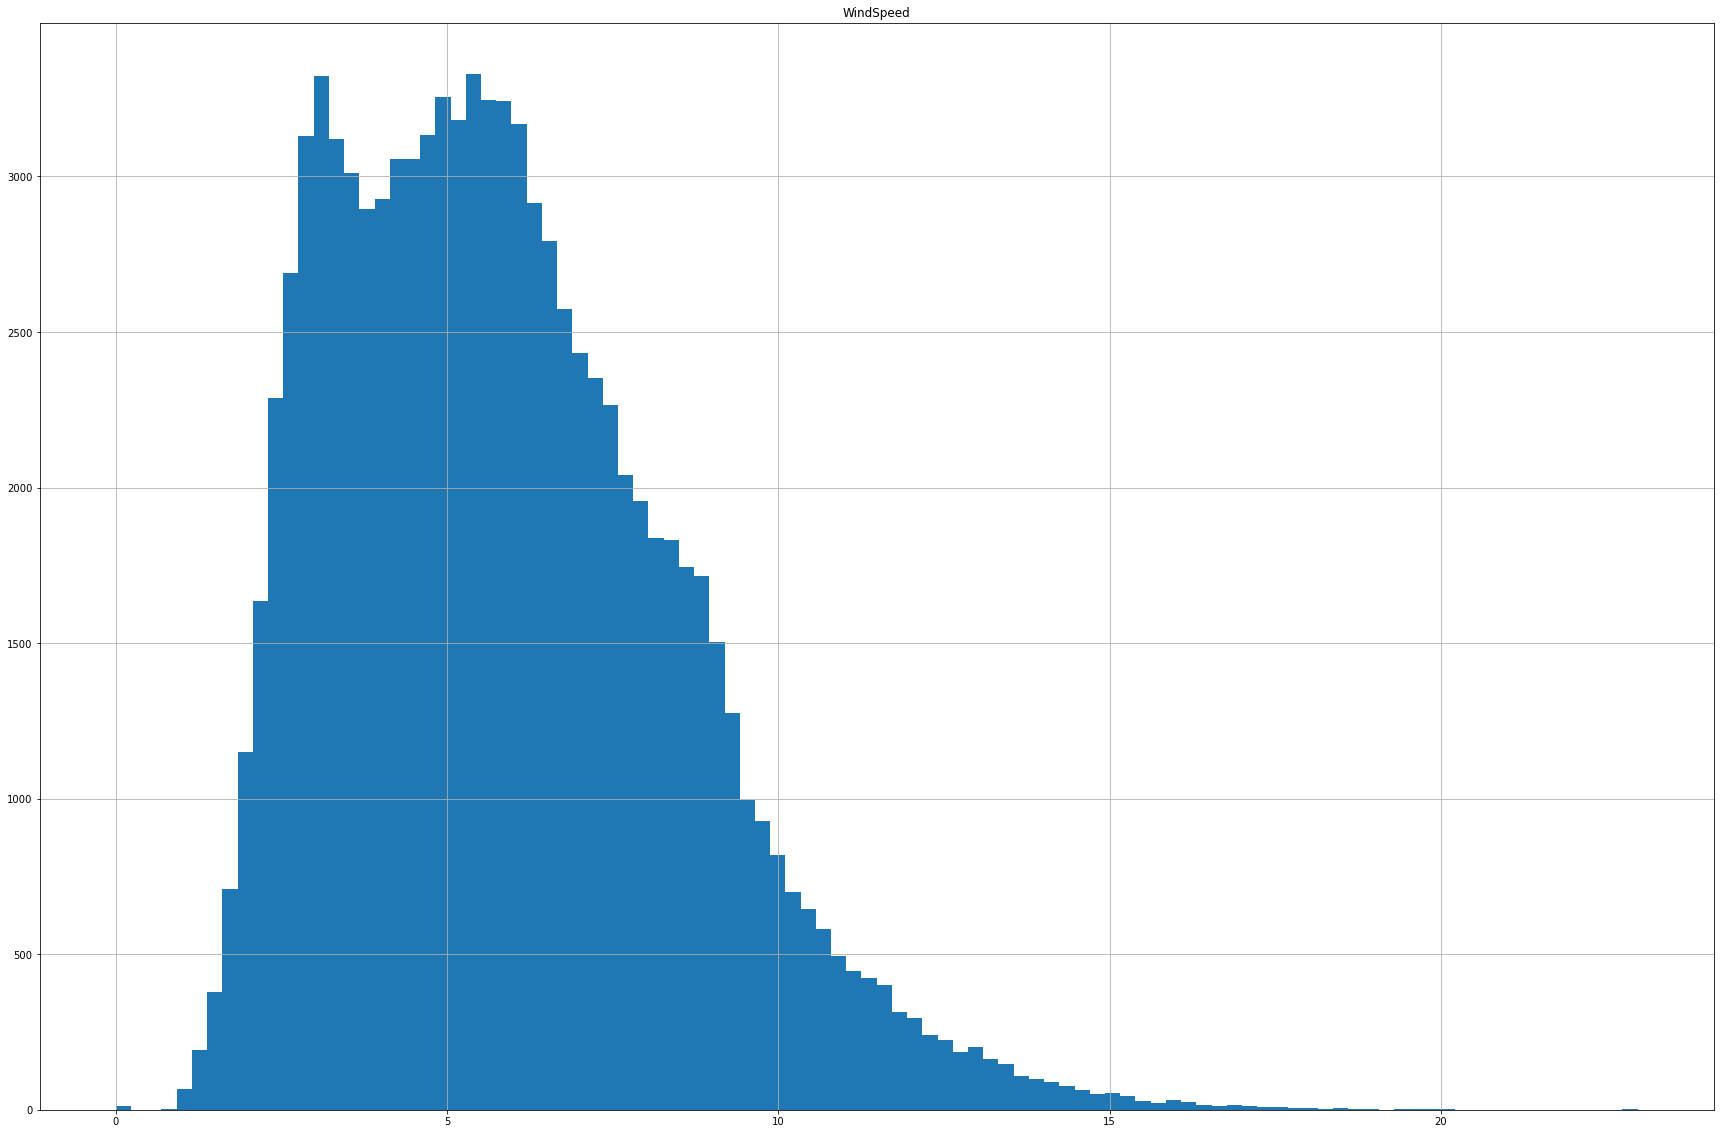

In [29]:
# plotting histogram (value distribution) for every feature for cleaned (non-nan) data
# 100 bins per histogram

Xc.hist(bins=100, figsize=(30,20))
plt.show()